In [1]:
# Predicting Student's Score based on hours studied

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv("score_updated.csv",header=0)
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
print('Dataset Shape =>', dataset.shape)
dataset.info()
dataset.describe()

Dataset Shape => (96, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   96 non-null     float64
 1   Scores  96 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.6 KB


,Hours,Scores
count,96.000000,96.000000
mean,5.267708,54.020833
std,2.503030,25.017459
min,1.000000,12.000000
25%,3.075000,30.750000
50%,5.250000,54.500000
75%,7.325000,74.250000
max,9.800000,99.000000


In [5]:
df=pd.DataFrame(dataset)

In [6]:
# Independent and dependent variables
x=df['Hours']
y=df['Scores']

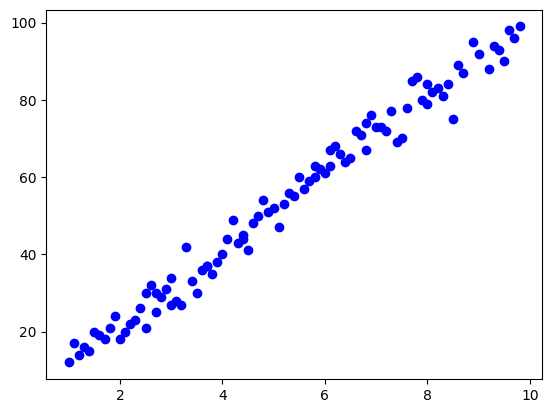

In [7]:
# plotting scatterplot
plt.scatter(x,y,c='blue')

In [8]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [9]:
# dataset has only 2 columns and not that of variation so no scaling is req

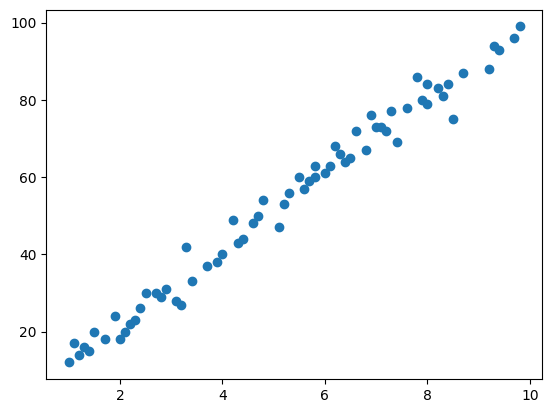

In [10]:
plt.scatter(x_train,y_train)

In [11]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
# regression.fit(x_train,y_train) 
# since LinearRegresion().fit expects both 2d arrays or matrix so we'll have to reshape our x_train and y_train for further model building

In [12]:
x_train=x_train.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)
x_test=x_test.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

In [13]:
regression.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
# finding cross val score
from sklearn.model_selection import cross_val_score
mse=cross_val_score(regression,x_train,y_train,cv=10,scoring='neg_mean_squared_error')
mse

array([ -3.60605842, -10.58342336, -41.96853429,  -7.34366009,
        -2.80957464,  -1.57933678,  -5.59349304, -13.66305477,
       -19.2289718 ,  -3.41915244])

In [15]:
np.mean(mse)

np.float64(-10.979525963629882)

In [16]:
y_pred=regression.predict(x_test)
y_pred

array([[28.04490497],
       [50.48603573],
       [31.94771032],
       [38.77761968],
       [81.70847852],
       [86.58698521],
       [75.8542705 ],
       [68.0486598 ],
       [27.06920363],
       [77.80567317],
       [55.36454241],
       [18.28789159],
       [62.19445178],
       [36.826217  ],
       [90.48979056],
       [95.36829725],
       [46.58323038],
       [39.75332102],
       [37.80191834],
       [51.46173706],
       [20.23929427],
       [96.34399858],
       [89.51408922],
       [69.02436114],
       [31.94771032],
       [29.0206063 ],
       [45.60752904],
       [60.2430491 ],
       [42.68042503]])

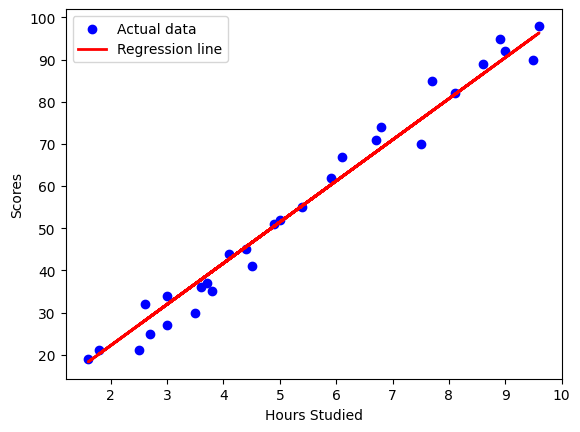

In [17]:
# Scatter plot of actual data (x_test vs y_test)
plt.scatter(x_test, y_test, color="blue", label="Actual data")

# Regression line (best fit line)
plt.plot(x_test, y_pred, color="red", linewidth=2, label="Regression line")

plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.legend()

In [18]:
# Evaluating R^2 score
from sklearn.metrics import r2_score
r2_score=r2_score(y_test,y_pred)
print(r2_score)

0.9768183341385437
